# Práctica 1 - Aprendizaje Automático Búsqueda Iterativa de Óptimos y Regresión Lineal

### Alumno: MIGUEL GARCÍA LÓPEZ
### Grupo: A2

Límite de entrega: 3 de Abril de 2022 a las 23:59 (PRADO)\
Valoración máxima: 12 puntos (+2 puntos de Bonus)

Es obligatorio presentar un informe con las valoraciones y decisiones adoptadas en el desarrollo de cada uno de
los apartados. En dicho informe se incluirán los gráficos generados. También deberá incluirse una valoración sobre la
calidad de los resultados encontrados. Sin este informe se considera que el trabajo NO ha sido presentado. El informe debe estar integrado en este mismo cuaderno
(intercalando texto, código y resultados).

# 1. EJERCICIO SOBRE LA BÚSQUEDA ITERATIVA DE  ÓPTIMOS (6.5 puntos)

EJERCICIO.1.1:  1 punto.\
 Implementar el algoritmo de gradiente descendente.

* Inicializamos las iteraciones a cero y el peso al peso inicial.
* Mientras las iteraciones no superen el máximo permitido y mientras nuestra función no sea lo suficientemente baja, no paramos de iterar y de aplicar el gradiente descendiente (cuyo principal objetivo es minimizar).
* Devolvemos los pesos y las iteraciones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

def gradient_descent(w_ini, lr, grad_fun, fun, epsilon, max_iters):
  iterations = 0
  w = w_ini # inicializamos w con la posición inicial dada
  ws = [] # ws es el histórico de pesos, lo usamos para visualizar los resultados del algoritmo
  ws.append(w)

  while iterations < max_iters and fun(w[0], w[1]) > epsilon:
    w = w - lr * grad_fun(w[0], w[1])
    iterations = iterations + 1
    ws.append(w)

  return w, iterations, ws 

Mounted at /content/drive


EJERCICIO.1.2: 2 puntos\
 Considerar la función $E(u, v) = (uve^{(−u^2−v^2)})^2$. Usar gradiente descendente para
encontrar un mınimo de esta función, comenzando desde el punto $(u, v) = (0.5, -0.5)$ y usando
una tasa de aprendizaje $\lambda = 0.1$.\
**a**) Calcular analíticamente y mostrar la expresión del gradiente de la función $E(u, v)$.\
**b**) ¿Cuántas iteraciones tarda el algoritmo en obtener por primera vez un valor de $E(u, v)$ inferior a $10^{−8}$.\
**c**) ¿En qué coordenadas $(u, v)$ se alcanzó por primera vez un valor igual o menor que $10^{-8}$ en el apartado anterior


1.2

Numero de iteraciones:  25117
Coordenadas obtenidas: ( 0.010000842574554565 ,  -0.010000842574554565 )
Gráfica 3D del Gradiente Descendiente obtenido:



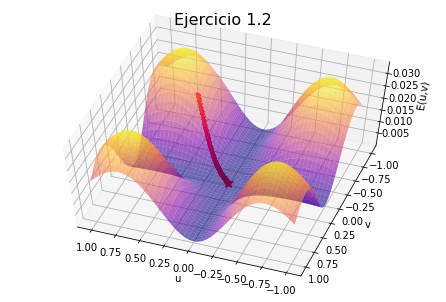

In [2]:
def E(u,v):
    return (u * v * np.e ** (-u ** 2 - v ** 2)) ** 2 #function   

#Derivada parcial de E con respecto a u
def dEu(u,v):
    return v ** 2 * (-4 * u ** 3 * np.e ** (2 * (-u ** 2 -v ** 2)) + 2 * u * np.e ** (2 * (-u ** 2 -v ** 2))) #Derivada parcial de E con respecto a u
    
#Derivada parcial de E con respecto a v
def dEv(u,v):
    return u ** 2 * (-4 * v ** 3 * np.e ** (2 * (-u ** 2 -v ** 2)) + 2 * v * np.e ** (2 * (-u ** 2 -v ** 2))) #Derivada parcial de E con respecto a v

#Gradiente de E
def gradE(u,v):
    return np.array([dEu(u,v), dEv(u,v)])

eta = 0.1 
visual = [60, 110]
w_historical = []
maxIter = 1000000
error2get = 1e-8
initial_point = np.array([0.5,-0.5])
w, it, w_historical = gradient_descent(initial_point, eta, gradE, E, error2get, maxIter)

print('1.2\n')
print ('Numero de iteraciones: ', it)
print ('Coordenadas obtenidas: (', w[0], ', ', w[1],')')

def display_figure(rng_val, fun, ws, colormap, title_fig, vis_coor):
    # https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
    from mpl_toolkits.mplot3d import Axes3D
    x = np.linspace(-rng_val, rng_val, 50)
    y = np.linspace(-rng_val, rng_val, 50)
    X, Y = np.meshgrid(x, y)
    Z = fun(X, Y) 
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.view_init(vis_coor[0], vis_coor[1])
    ax.plot_surface(X, Y, Z, edgecolor='none', rstride=1,
                            cstride=1, cmap=colormap, alpha=.6)
    if len(ws)>0:
        ws = np.asarray(ws)
        min_point = np.array([ws[-1,0],ws[-1,1]])
        min_point_ = min_point[:, np.newaxis]
        ax.plot(ws[:-1,0], ws[:-1,1], E(ws[:-1,0], ws[:-1,1]), 'r*', markersize=5)
        ax.plot(min_point_[0], min_point_[1], E(min_point_[0], min_point_[1]), 'r*', markersize=10)

    if len(title_fig)>0:
        fig.suptitle(title_fig, fontsize=16)
    ax.set_xlabel('u')
    ax.set_ylabel('v')
    ax.set_zlabel('E(u,v)')

print("Gráfica 3D del Gradiente Descendiente obtenido:\n")
display_figure(1, E, w_historical, 'plasma', 'Ejercicio 1.2', visual)

### Derivadas parciales de $E(u,v)$ respecto de $u$ y $v$:
* $\frac{\partial}{\partial u}$${(uve^{(-u^2 - v^2)}})^2$ = $v^2(-4u^3e^{(2(-u^2-v^2)})+2ue^{(2(-u^2-v^2))}$ 

* $\frac{\partial}{\partial v}$${(uve^{(-u^2 - v^2)}})^2$ = $u^2(-4v^3e^{(2(-u^2-v^2)})+2ve^{(2(-u^2-v^2))}$ 

EJERCICIO.1.3: 2 puntos\
Considerar ahora la función $f(x, y) = x^2 + 2y^2 + 2sin(2\pi x)sin(\pi y)$ \

**a**) Usar gradiente descendente para minimizar esta función. Usar como punto inicial $(x_0 =
-1, y_0 = 1)$, (tasa de aprendizaje $\eta$ = 0,01 y un máximo de 50 iteraciones. Generar un
gráfico de cómo desciende el valor de la función con las iteraciones. Repetir el experimento pero usando $\eta$ = 0,1, comentar las diferencias y su dependencia de $\eta$. \
**b**) Obtener el valor mínimo y los valores de las variables $(x, y)$ en donde se alcanzan cuando
el punto de inicio se fija en: (-0.5, -0.5), (1, 1), (2.1,-2.1), (-3, 3), (-2, 2). Generar una
tabla con los valores obtenidos. Comentar la dependencia del punto inicial.

1.3 -- APARTADO A

Gráfica 3D del Gradiente Descendiente obtenido con N = 0.01 y N = 0.1:



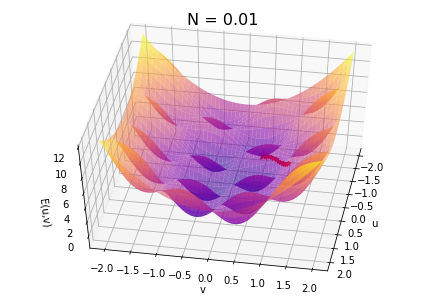

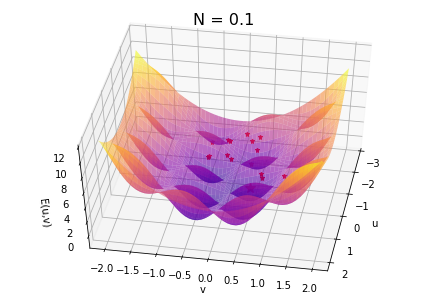

In [3]:
def F(x,y):
    return x ** 2 + 2 * y ** 2 + 2 * np.sin(2 * np.pi * x) * np.sin(np.pi * y) #function   

#Derivada parcial de F con respecto a x
def dFx(x,y):
    return  2 * x + 4 * np.pi * np.cos(2 * np.pi * x) * np.sin(np.pi * y) #Derivada parcial de F con respecto a x

#Derivada parcial de F con respecto a y
def dFy(x,y):
    return  4 * y + 2 * np.pi * np.sin(2 * np.pi * x) * np.cos(np.pi * y) #Derivada parcial de F con respecto a y

#Gradiente de F
def gradF(x,y):
    return np.array([dFx(x,y), dFy(x,y)])

eta = 0.01
visual = [50, 10]
maxIter = 50
w_historical = []
error2get = 1e-8
initial_point = np.array([-1,1])
w, it, w_historical = gradient_descent(initial_point, eta, gradF, F, error2get, maxIter)

print('1.3 -- APARTADO A\n')
print("Gráfica 3D del Gradiente Descendiente obtenido con N = 0.01 y N = 0.1:\n")
display_figure(2, F, w_historical, 'plasma', 'N = 0.01', visual)

eta = 0.1
w, it, w_historical = gradient_descent(initial_point, eta, gradF, F, error2get, maxIter)
display_figure(2, F, w_historical, 'plasma', 'N = 0.1', visual)

### Derivadas parciales de $f(x, y)$ respecto de $x$ e $y$:
* $\frac{\partial}{\partial x}$ $x^2 + 2y^2 + 2sin(2\pi x)sin(\pi y)$ = $2x+4{\pi}{\cos(2{\pi}x)}{\sin({\pi}y)}$

* $\frac{\partial}{\partial x}$ $x^2 + 2y^2 + 2sin(2\pi x)sin(\pi y)$ = $4x+2{\pi}{\sin(2{\pi}x)}{\cos({\pi}y)}$

* Ej 1.3 - a) Las diferencias principales que observamos son las siguiente:
  * Con n = 0.01 los saltos son más pequeños, por lo que la curva es más continua. A diferencia de con n = 0.1, los saltos son más grandes por lo que la curva es más discontinua, los valores para la función tienen más distancia entre ellos.
  * Con n = 0.1, si investigamos los valores de w (los pesos), podemos ver que no descienden siempre, como se supone que debería ocurrir. En algunas iteraciones el valor para w aumenta, lo que nos podría estar diciendo que nos hemos saltado un mínimo por haber dado un salto demasiado grande y por lo tanto podemos sacar la conclusión de que el learning rate es demasiado alto.

In [14]:
print('1.3 -- APARTADO B')
eta = 0.01
w_points = np.empty([0], float)

initial_point = np.array([-0.5,-0.5])
w, it, w_historical = gradient_descent(initial_point, eta, gradF, F, error2get, maxIter)
w_points = np.append(w_points, w)

initial_point = np.array([1,1])
w, it, w_historical = gradient_descent(initial_point, eta, gradF, F, error2get, maxIter)
w_points = np.append(w_points, w)

initial_point = np.array([2.1,-2.1])
w, it, w_historical = gradient_descent(initial_point, eta, gradF, F, error2get, maxIter)
w_points = np.append(w_points, w)

initial_point = np.array([-3,3])
w, it, w_historical = gradient_descent(initial_point, eta, gradF, F, error2get, maxIter)
w_points = np.append(w_points, w)

initial_point = np.array([-2,2])
w, it, w_historical = gradient_descent(initial_point, eta, gradF, F, error2get, maxIter)
w_points = np.append(w_points, w)

print("\nMinimo {} para coordenadas [{},{}] - PtoInicial (-0.5,0.5)".format(F(w_points[0], w_points[1]), w_points[0], w_points[1]))
print("Minimo {} para coordenadas [{},{}] - PtoInicial (1,1)".format(F(w_points[2], w_points[3]), w_points[2], w_points[3]))
print("Minimo {} para coordenadas [{},{}] - PtoInicial (2.1,-2.1)".format(F(w_points[4], w_points[5]), w_points[4], w_points[5]))
print("Minimo {} para coordenadas [{},{}] - PtoInicial (-3,3)".format(F(w_points[6], w_points[7]), w_points[6], w_points[7]))
print("Minimo {} para coordenadas [{},{}] - PtoInicial (-2,2)".format(F(w_points[8], w_points[9]), w_points[8], w_points[9]))

1.3 -- APARTADO B

Minimo -0.4864044040605069 para coordenadas [-0.6156637061435917,-0.48] - PtoInicial (-0.5,0.5)
Minimo -0.4009433744646065 para coordenadas [0.7451102747433754,0.6463113079444323] - PtoInicial (1,1)
Minimo 4.6338399249937785 para coordenadas [1.665111536546408,-1.1727823906273158] - PtoInicial (2.1,-2.1)
Minimo 3.6941858237202947 para coordenadas [-2.1888045674248513,0.5868301078836456] - PtoInicial (-3,3)
Minimo 4.633734084163328 para coordenadas [-1.6643355098173194,1.1712736530308994] - PtoInicial (-2,2)


* Ej 1.3 - b) Podemos ver que con distintos puntos iniciales, generamos distintos mínimos para la función. Esto es así debido a que el gradiente descendiente minimiza respecto a un punto inicial y puede caer en un mínimo local, no nos asegura el mínimo global. Por ello, la elección de un punto inicial por el que empezar a aplicar el gradiente descendiente es de alta relevancia. Un caso totalmente indeseado, pero que podría suceder, sería comenzar en un punto cuyo mínimo local esté muy por encima del resto de valores de la función, por lo que los resultados serían obviamente pésimos.

EJERCICIO.1.4: (1.5 punto)\
 ¿Cuál sería su conclusión sobre la verdadera dificultad de encontrar el mínimo
global de una función arbitraria?

- La verdadera dificultad, vistos los resultados anteriores, sería la de escoger un punto inicial óptimo (o al menos sub-óptimo). Escoger un leraning rate es algo menos laborioso, uno bajo aunque tarde mucho nos garantizaría llegar al mínimo, y escoger uno que sea más eficiente en tiempo no resultaría muy complicado debido a la posibilidad de analizar los distintos valores de w y como se comportan con distintos learning rates.

# 2 EJERCICIO SOBRE REGRESIÓN LINEAL (5.5 puntos)
Este ejercicio ajusta modelos de regresión a vectores de características extraídos a partir de
imágenes de dígitos manuscritos. En particular, se extraen dos características concretas que miden el valor medio del nivel de gris y la simetría del dígito respecto de su eje vertical. Solo se seleccionarán
para este ejercicio las imágenes de los números 1 y 5.

EJERCICIO.2.1:  2.5 puntos\
 Estimar un modelo de regresión lineal, a partir de los datos proporcionados por
los vectores de características dados, usando tanto el algoritmo de la pseudo-inversa como el
gradiente descendente estocástico (SGD). Las etiquetas serán $\{-1,1\}$, una por cada vector de
cada uno de los números. Pintar las soluciones obtenidas junto con los datos usados en el
ajuste. Valorar la bondad del resultado usando $E_{in}$ y $E_{out}$ (para $E_{out}$ calcular las predicciones
usando los datos del fichero de test).

Bondad del resultado para grad. descendente estocastico:

Ein:  0.07999823596475315
Eout:  0.13225639904556458

Bondad del resultado para pseudoinversa:

Ein:  0.07918658628900382
Eout:  0.1309538372005259


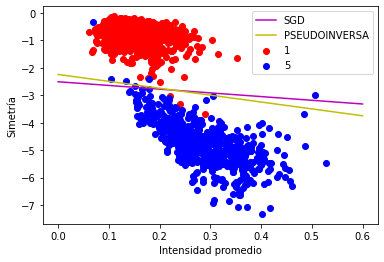

In [5]:
label5 = 1
label1 = -1

# Funcion para leer los datos
def readData(file_x, file_y):
	# Leemos los ficheros	
	datax = np.load(file_x)
	datay = np.load(file_y)
	y = []
	x = []	
	# Solo guardamos los datos cuya clase sea la 1 o la 5
	for i in range(0,datay.size):
		if datay[i] == 5 or datay[i] == 1:
			if datay[i] == 5:
				y.append(label5)
			else:
				y.append(label1)
			x.append(np.array([1, datax[i][0], datax[i][1]]))
			
	x = np.array(x, np.float64)
	y = np.array(y, np.float64)
	
	return x, y

# Funcion para calcular el error
def Err(x,y,w):
	# El tamaño de la muestra nos lo da x.shape[0], que es el número de filas de la matriz
	size = x.shape[0] 
	error = 0
 
  # Para cada elemento calculamos la sumatoria del error
	for i in range(size):
		error += (np.dot(w, x[i]) - y[i]) ** 2

	return error/size

# Gradiente Descendente Estocastico
def sgd(x, y, lr, epsilon, Error, maxIters, min_bach_size, w_ini=np.array([0,0,0])):
	# Caracteristicas = caract_iniciales
	w = w_ini
 
  # Creamos indices desde 0 hasta el número de elementos que hay en la muestra, lo
	# utilizaremos más tarde para desordenar aleatoriamente los elementos de la muestra
	indices = np.arange(0, x.shape[0])
 
	iter = 0
	sum = 0
	n = min_bach_size

	# Mientras no lleguemos a un mínimo de error no terminamos, a menos que lleguemos
	# a un número máximo de iteraciones
	while Error(x, y, w) > epsilon and iter < maxIters:
	 #Desordenamos las muestras aleatoriamente
	 np.random.shuffle(indices)
	 x_aux = x[indices]
	 y_aux = y[indices]
	 
	 # Recorremos todos los minibatches hasta el final
	 for i in range(x.shape[0]):
		 sum += np.dot(x_aux[i,::1], (np.dot(w, x_aux[i]) - y_aux[i]))
	   
		 # Si terminamos un minibatch, entonces actualizamos los pesos
		 # Si hemos llegado al final, pero el minibatch no es del tamaño especificado,
		 # actualizamos igualmente, como si fuese un minibatch, pero de menor tamaño
		 if i % n == 0 or i == x.shape[0]:
			 w = w - lr * (2 / n) * sum
			 sum = 0
		
	 iter += 1

	return w

# Pseudoinversa	
def pseudoinverse(datos, label):
	# Sacamos los valores singulares de x
	U, D, VT = np.linalg.svd(datos)
  
	# Nos devuelve la diagonal, si aplicamos la siguiente función a la diagonal,
	# nos devolverá la matriz completa
	D = np.diag(D)
  
	# Calculamos xT * x -> v * d * d * vT
	X1 = np.dot(np.dot(np.dot(VT.T, D), D), VT)
  
	# Calculamos psinversa de X -> (xT * X)^-1 * xT
	X_psi = np.dot(np.linalg.inv(X1), np.transpose(datos))
  
	# Obtenemos pesos -> w = psi(X) * y
	w = np.dot(X_psi,label)
	return w

path_trx, path_try = '/content/drive/My Drive/Colab Notebooks/datos/X_train.npy', '/content/drive/My Drive/Colab Notebooks/datos/y_train.npy'
path_tex, path_tey = '/content/drive/My Drive/Colab Notebooks/datos/X_test.npy', '/content/drive/My Drive/Colab Notebooks/datos/y_test.npy'

# Lectura de los datos de entrenamiento
x, y = readData(path_trx, path_try)
# Lectura de los datos para el test
x_test, y_test = readData(path_tex, path_tey )

lr = 0.01
epsilon = 0.08
max_iter = 500
mb_size = 32

w = sgd(x, y, lr, epsilon, Err, max_iter, mb_size)
w_1 = pseudoinverse(x, y)
print ('Bondad del resultado para grad. descendente estocastico:\n')
print ("Ein: ", Err(x,y,w))
print ("Eout: ", Err(x_test, y_test, w))

print ('\nBondad del resultado para pseudoinversa:\n')
print ("Ein: ", Err(x,y,w_1))
print ("Eout: ", Err(x_test, y_test, w_1))

datos_et1 = []
datos_et5 = []

# Itero para comprobar que etiqueta tiene cada dato de la muestra y lo separo en
# dos vectores (me quedo con los dos ultimos datos de cada elemento)
for etiqueta, dat in zip(y, x):
	if etiqueta == label1:
		datos_et1.append(np.array([dat[1], dat[2]]))
	else:
		datos_et5.append(np.array([dat[1], dat[2]]))

# Convierto los vectores en vectores numpy para su correcta visualización,
# ya que si no lo hiciesemos su iteración no sería posible
datos_et1 = np.array(datos_et1)
datos_et5 = np.array(datos_et5)

plt.scatter(datos_et1[:,0:1], datos_et1[:,1:2], c = 'r', label = '1')
plt.scatter(datos_et5[:,0:1], datos_et5[:,1:2], c = 'b', label = '5')

# Generamos datos para la x en la gráfica
x_f = np.linspace(0, 0.6, 100)  

# Dada la ecuación general de la recta (Ax + By + C = 0), despejamos la y, que en
# nuestro caso no es la de la ecuación (el término independiente en nuestro caso
# es w[0]) y ya podemos representar la recta -> w[0] + w[1]x + w[2]y = 0
f_sgd = (-w[0] - w[1] * x_f) / w[2]
f_psi = (-w_1[0] - w_1[1] * x_f) / w_1[2]

plt.plot(x_f, f_sgd, c = 'm', label = 'SGD')
plt.plot(x_f, f_psi, c = 'y', label = 'PSEUDOINVERSA')

plt.xlabel("Intensidad promedio")
plt.ylabel("Simetría")
plt.legend()
plt.show()

### Explicación ejercicio 2.1:
* Función de error:
  - Para la función lo primero que hago es calcular el tamaño de la muestra, en nuestro caso es $x.shape[0]$ lo cual nos devuelve el número de filas (número de elementos, siendo las columnas las características (en este caso no nos interesan)). Después calculamos la sumatoria del error y devolvemos el valor completo. $E_{in}(w) = {\frac{1}{N}}{\sum_{n=1}^{N}(W_{T}x_{n}-y_{n})}$
* SGD:
  - Parámetros: los parámetros que voy a utilizar son:
     - 1) x -> datos
     - 2) y -> etiquetas
     - 3) lr -> learning rate
     - 4) epsilon -> error mínimo
     - 5) Error -> función error de regresión
     - 6) maxIters -> máximas iteraciones (para evitar tiempos elevados)
     - 7) min_bach_size -> tamaño de los minibatches
  - Explicación: inicializo las w a 0 y acto seguido genero índices desde 0 al número de elementos que vayamos a utilizar, estos índices los utilizaremos para barajar aleatoriamente los datos y etiquetas de igual forma, de este modo se cumple la aleatoriedad y podemos barajar cuantas veces queramos de una forma muy sencilla. El bucle acaba cuando se llega a las iteraciones máximas o superamos el umbral mínimo, lo que ocurra antes. Dentro del bucle general barajamos los datos, después, recorremos los datos hasta el final actualizando la sumatoria. Cuando acabemos un minibatch actualizamos las w (en mi caso se sabe que hemos acabado un minibatch porque el módulo entre las iteraciones y el tamaño del minibatch es cero, o, cuando hemos llegado al final (en cuyo caso el último minibatch es de menor tamaño que el resto, pero es indiferente). Estos procesos se repiten hasta terminar.

* Pseudoinversa: 
  - Explicación: calculamos la pseudoinversa por medio de los valores singulares de la matriz de datos. Sabemos que ${X}^{\dagger} = ({X}^TX)^{-1}X^T$ y que $X^TX = VDDV^T$. De esta forma vemos que calculando los valores singulares de $X$ (SVD) podemos calcular la pseudoinversa fácilmente. SVD = $X = UDV^T$.

* Gráficas:
  - He separado los datos por sus etiqueas (-1, 1) y para pintar las funciones de SGD y pseudoinversa que separan los datos, he calculado la función de cada una. Función de la recta -> $Ax + By + C = 0$

EJERCICIO.2.2:  3 puntos\
 En este apartado exploramos cónmo se transforman los errores Ein y Eout cuando aumentamos la complejidad del modelo lineal usado. Ahora hacemos uso de la función
$simula\_unif (N, 2, size)$ que nos devuelve N coordenadas 2D de puntos uniformemente muestreados dentro del cuadrado definido por $[−size, size]\times[−size, size]$. Se debe realizar el siguiente experimento: \
**a**) Generar una muestra de entrenamiento de $N = 1000$ puntos en el cuadrado $X = [−1, 1]\times
[−1, 1]$. Pintar el mapa de puntos 2D.\
**b**) Consideremos la función $f(x_1, x_2) = sign((x_1 − 0,2)^2 + x_2^2 − 0,6)$ que usaremos para
asignar una etiqueta a cada punto de la muestra anterior. Introducimos ruido sobre las
etiquetas cambiando aleatoriamente el signo de un $10\%$ de las mismas. Pintar el mapa
de etiquetas obtenido.\
**c**) Usando como vector de características (1, x1, x2), ajustar un modelo de regresión lineal al conjunto de datos generado y estimar los pesos ${\bf w}$. Estimar el error de ajuste $E_{in}$ usando SGD. \
**d**) Ejecutar todo el experimento definido por (a)-(c) 1000 veces (generamos 1000 muestras
diferentes) y calcular el valor medio de los errores $E_{in}$ de las 1000 muestras.
Generar 1000 puntos nuevos por cada iteración y calcular con ellos el valor de $E_{out}$
en dicha iteración. Calcular el valor medio de $E_{out}$ en todas las iteraciones. \
**e**) Valore qué tan bueno considera que es el ajuste con este modelo lineal a la vista de los
valores medios obtenidos de $E_{in}$ y $E_{out}$.

*   Repetir el mismo experimento anterior pero usando características no lineales. Ahora
usaremos el siguiente vector de características: $\Phi(x) = (1, x_1, x_1^2,x_1x_2, x_2, x_2^2)$. Ajustar el nuevo modelo de regresión lineal y calcular el nuevo vector de pesos $\bf\hat w$. Calcular los errores promedio de $E_{in}$ y $E_{out}$.
*   A la vista de los resultados de los errores promedios $E_{in}$ y $E_{out}$ obtenidos en los dos experimentos, ¿qué modelo considera que es el más adecuado? Justifique la respuesta. 
 

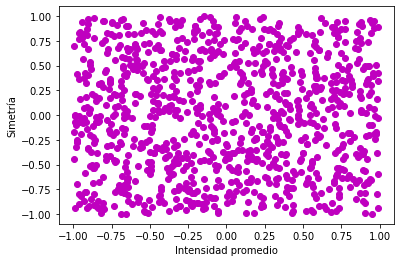

In [6]:
# Simula datos en un cuadrado [-size,size]x[-size,size]
def simula_unif(N, d, size):
  return np.random.uniform(-size,size,(N,d))

# Creamos la muestra de entrenamiento con N = 1000 y size = 1
x_p = simula_unif(1000, 2, 1)

# Pintamos la muestra
plt.scatter(x_p[:,0], x_p[:,1], c = 'm', label = '1')
plt.xlabel("Intensidad promedio")
plt.ylabel("Simetría")
plt.show()

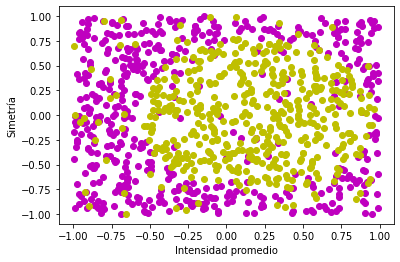

In [7]:
def sign(x):
	if x >= 0:
		return 1
	return -1

def f(x1, x2):
	return sign((x1-0.2)**2+x2**2-0.6) 

# Recojo etiquetas para cada elemento de la muestra
y_p = [f(x1, x2) for x1, x2 in zip(x_p[:,0], x_p[:,1])]

# Introduzco ruido a un 10% de los datos
for i in range(round(len(y_p) * 0.1)):
	index = np.random.randint(0, len(y_p))
	y_p[index] *= -1

x1, x2 = [], []

# Diferencio clases de datos con dos arrays mirando las etiquetas
for etiqueta, dat in zip(y_p, x_p):
	if etiqueta == 1:
		x1.append(np.array([dat[0], dat[1]]))
	else:
		x2.append(np.array([dat[0], dat[1]]))
	
x1 = np.array(x1)
x2 = np.array(x2)

plt.scatter(x1[:,0], x1[:,1], c = 'm', label = '1')
plt.scatter(x2[:,0], x2[:,1], c = 'y', label = '-1')
plt.xlabel("Intensidad promedio")
plt.ylabel("Simetría")
plt.show()

In [8]:
# Atributos para el sgd
lr = 0.01
epsilon = 0.1
max_iter = 200
mb_size = 32

x_data = []

# Creamos vector de caracteristicas
for i in range(x_p.shape[0]):
  x_data.append(np.array([1, x_p[i,0], x_p[i,1]]))

y_data = np.array(y_p)
x_data = np.array(x_data)

w = sgd(x_data, y_data, lr, epsilon, Err, max_iter, mb_size)
print ('Resultado para grad. descendente estocastico:\n')
print ("Ein: ", Err(x_data,y_data,w))

Resultado para grad. descendente estocastico:

Ein:  0.9168402582414148


Media del error obtenido en el experimento (Ein): 0.9265000046717276
Media del error obtenido en el experimento (Eout): 0.9252452083488055



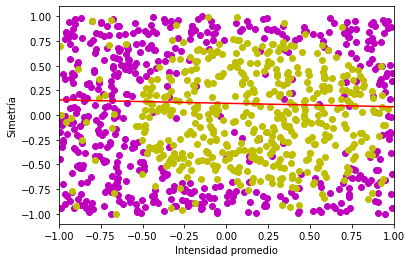

In [9]:
def crear_muestras_lineal():
  muestra = simula_unif(1000, 2, 1)
  etiquetas = [f(x1, x2) for x1, x2 in zip(muestra[:,0], muestra[:,1])]

  poblacion = simula_unif(1000, 2, 1)
  etiq_poblacion = [f(x1, x2) for x1, x2 in zip(poblacion[:,0], poblacion[:,1])]

  # Introduzco ruido a un 10% de los datos
  for i in range(round(len(etiquetas) * 0.1)):
    index = np.random.randint(0, len(etiquetas))
	  
    etiquetas[index] *= -1
    etiq_poblacion[index] *= -1

  muestra_aux = [(1, muestra[i,0], muestra[i,1]) for i in range(muestra.shape[0])]
  poblacion_aux = [(1, poblacion[i,0], poblacion[i,1]) for i in range(poblacion.shape[0])]

  etiquetas_aux = np.array(etiquetas)
  muestra_aux = np.array(muestra_aux)
  etiq_poblacion_aux = np.array(etiq_poblacion)
  poblacion_aux = np.array(poblacion_aux)

  w = sgd(muestra_aux, etiquetas_aux, 0.01, 0.1, Err, 200, 32)

  return Err(muestra_aux, etiquetas_aux, w), Err(poblacion_aux, etiq_poblacion_aux, w), w

ein_acumulado = 0
eout_acumulado = 0

for i in range(10):
  ein_aux, eout_aux, w_l = crear_muestras_lineal()
  ein_acumulado += ein_aux
  eout_acumulado += eout_aux

print('Media del error obtenido en el experimento (Ein): {}'.format(ein_acumulado/10))
print('Media del error obtenido en el experimento (Eout): {}\n'.format(eout_acumulado/10))

plt.scatter(x1[:,0], x1[:,1], c = 'm', label = '1')
plt.scatter(x2[:,0], x2[:,1], c = 'y', label = '-1')

eje_x = np.linspace(-1, 1, 100)
eje_y = (-w_l[0] - w_l[1] * eje_x) / w_l[2]
plt.plot(eje_y, eje_x, c= 'r')
plt.xlim(-1,1)
plt.xlabel("Intensidad promedio")
plt.ylabel("Simetría")
plt.show()

### Valoración ejercicio 2.2 - Apartado e:
* De los errores obtenidos podemos sacar la conclusión de que un modelo lineal no es lo suficientemente bueno para abordar este problema. A simple vista vemos que los datos no son separables linealmente (a menos que nos satisfaga un error casi del 100% en el experimento). Por ello, una aproximación lineal, por muy buena que sea en su acercamiento, no podrá dividir la muestra de manera clasificable. Esto se solucionaría con una aproximación no lineal, de modo tal que los datos si podrían ser separados con mejor precisión.

Media del error obtenido en el experimento (Ein): 0.5662313103745242
Media del error obtenido en el experimento (Eout): 0.5702357443637063



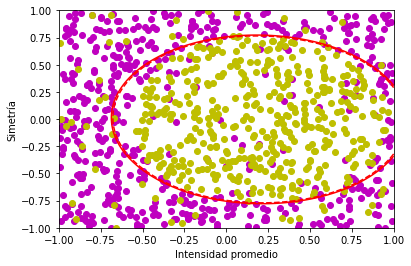

In [10]:
def crear_muestras_no_lineal():
  muestra = simula_unif(1000, 2, 1)
  etiquetas = [f(x1, x2) for x1, x2 in zip(muestra[:,0], muestra[:,1])]

  poblacion = simula_unif(1000, 2, 1)
  etiq_poblacion = [f(x1, x2) for x1, x2 in zip(poblacion[:,0], poblacion[:,1])]

  # Introduzco ruido a un 10% de los datos
  for i in range(round(len(etiquetas) * 0.1)):
    index = np.random.randint(0, len(etiquetas))
	  
    etiquetas[index] *= -1
    etiq_poblacion[index] *= -1

  muestra_aux = [(1, muestra[i,0], muestra[i,0] ** 2, muestra[i,0] * muestra[i,1], muestra[i,1], muestra[i,1] ** 2) for i in range(muestra.shape[0])]
  poblacion_aux = [(1, poblacion[i,0], poblacion[i,0] ** 2, poblacion[i,0] * poblacion[i,1], poblacion[i,1], poblacion[i,1] ** 2) for i in range(muestra.shape[0])]

  etiquetas_aux = np.array(etiquetas)
  muestra_aux = np.array(muestra_aux)
  etiq_poblacion_aux = np.array(etiq_poblacion)
  poblacion_aux = np.array(poblacion_aux)

  w = sgd(muestra_aux, etiquetas_aux, 0.01, 0.1, Err, 200, 32, np.array([0,0,0,0,0,0]))

  return Err(muestra_aux, etiquetas_aux, w), Err(poblacion_aux, etiq_poblacion_aux, w), w

ein_acumulado = 0
eout_acumulado = 0

for i in range(10):
  ein_aux, eout_aux, w_nl = crear_muestras_no_lineal()
  ein_acumulado += ein_aux
  eout_acumulado += eout_aux

print('Media del error obtenido en el experimento (Ein): {}'.format(ein_acumulado/10))
print('Media del error obtenido en el experimento (Eout): {}\n'.format(eout_acumulado/10))

plt.scatter(x1[:,0], x1[:,1], c = 'm', label = '1')
plt.scatter(x2[:,0], x2[:,1], c = 'y', label = '-1')

X = np.linspace(-1, 1, 100)
Y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(X, Y)
Z = w_nl[0] + w_nl[1]*X + w_nl[2]*X**2 + w_nl[3]*X*Y + w_nl[4]*Y + w_nl[5]*Y**2

plt.contour(X, Y, Z, colors= 'r', levels=[-0.01, 0.01])
plt.xlabel("Intensidad promedio")
plt.ylabel("Simetría")
plt.show()

### Valoración ejercicio 2.2 - Apartado d.2:
* El modelo que mejor se ajusta, vistos los resultados de ambos experimentos aplicando características lineales y no lineales, es el modelo no lineal. Esto se debe a que no en todos los casos la relación entre variables tiene que ser lineal (es una relación simple y puede haber casos más complejos que presenten relaciones más complejas). El problema presenta una solución a simple vista obvia, pero claro, las relaciones que presentan los distintos puntos en el plano no pueden ser ajustadas adecuadamente de manera lineal, el modelo no lineal en cambio se ajusta mucho mejor, consiguiendo minimizar el error, debido a la información extra recabada por el vector de características polimonial aplicado.

###[NOTA] -> He realizado múltiples ejecuciones con tamaños de N = 10, 20, 50, 100 y 200 en los dos útlimos experimentos para ver las diferencias entre resultados con distintos tamaños. Esto lo he realizado debido a la gran cantidad de tiempo que consumían 1000 iteraciones, a falta de poder ejecutarlas he aplicado distintas ejecuciones, pero con menos tamaño. Las diferencias eran inexistentes en los experimentos realizados.

**BONUS** (2 puntos) 
**El BONUS solo se tendrá en cuenta si se ha obtenido al menos el 75 % de los puntos de la parte obligatoria**

Implementar el algoritmo de minimizaciónn de Newton y aplicarlo a la función $f(x, y)$ dada en el Ejercicio 1.3. Desarrolle los mismos experimentos usando los mismos puntos de inicio.
Generar un gráfico de cómo desciende el valor de la función con las iteraciones. Extraer conclusiones sobre las conductas de los algoritmos comparando la curva de decrecimiento de la función calculada en el apartado anterior y la correspondiente obtenida con gradiente descendente